In [6]:
import os
os.chdir("/Users/nickl/Documents/College/DATA 481 - Gene Data")

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression
from sklearn.metrics import accuracy_score, classification_report

Filtered Gene Expression Dataset Random Forest

In [ ]:
#Loading filtered dataset
df = pd.read_csv("filtered_gene_expression.csv")
df.shape
#loading meta dataset
metadf = pd.read_csv("metadata.csv")
metadf.shape 

(783, 7)

In [ ]:
#merging meta df with gene expression df
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df = pd.merge(df, metadf, on =  "mRNA", how='left')
df.set_index("mRNA", inplace=True)
df.shape

(783, 2006)

In [ ]:
#setting up x and y for random forest
df = df.dropna(subset=["ER"])

X = df.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = df["ER"] 

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#fitting random forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)  # n_estimators: Number of trees

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
#Creating predictions from the model
y_pred = rf.predict(X_test)

In [ ]:
#checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

    Negative       1.00      0.82      0.90        38
    Positive       0.93      1.00      0.97        97

    accuracy                           0.95       135
   macro avg       0.97      0.91      0.93       135
weighted avg       0.95      0.95      0.95       135



Cross-Validation Filtered Gene Expression Random Forest

In [1]:
from sklearn.model_selection import cross_val_score

In [ ]:
#creating model and fitting it using cross validation
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.95555556 0.94074074 0.92537313 0.92537313 0.89552239]
Mean Accuracy: 0.9285
Standard Deviation: 0.0199


Random Forest on All Protein Coding Genes

In [ ]:
pcdf = pd.read_csv("All_Protein_Coding_Genes.csv", low_memory = False)

In [ ]:
pcdf.shape

(785, 19945)

In [ ]:
#merging meta df with gene expression df
pcdf.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
pcdf = pd.merge(pcdf, metadf, on =  "mRNA", how='left')
pcdf.set_index("mRNA", inplace=True)

In [ ]:
#setting up x and y for random forest
fpcdf = pcdf.dropna(subset=["ER"])

X = fpcdf.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = fpcdf["ER"] 

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#fitting random forest model
pcrf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators: Number of trees

# Train the model
pcrf.fit(X_train, y_train)

y_pred = pcrf.predict(X_test)

#checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

    Negative       1.00      0.84      0.91        38
    Positive       0.94      1.00      0.97        97

    accuracy                           0.96       135
   macro avg       0.97      0.92      0.94       135
weighted avg       0.96      0.96      0.95       135



Cross Validation RF on All Protein Coding Genes

In [ ]:
#creating model and fitting it using cross validation
pcrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pcrf, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.94074074 0.93333333 0.91791045 0.90298507 0.86567164]
Mean Accuracy: 0.9121
Standard Deviation: 0.0266


In [ ]:

#checking to make sure a class imbalance doesn't have an effect
class_counts = y.value_counts()
print(class_counts)
510/(510 + 162)

ER
Positive    510
Negative    162
Name: count, dtype: int64


0.7589285714285714

Random Forest on All Normalized Genes

In [ ]:
normgendf = pd.read_csv("normalized_expression.csv", low_memory = False)

In [ ]:
#Preps normgendf for merger
normgendf = normgendf.T
normgendf.columns = normgendf.iloc[0]  # Assign first row as column headers
normgendf = normgendf.iloc[1:]
normgendf.shape

(783, 60616)

In [ ]:
#merging meta df with gene expression df
normgendf = normgendf.rename_axis("mRNA")
normgendf = pd.merge(normgendf, metadf, on =  "mRNA", how='left')
normgendf.set_index("mRNA", inplace=True)
normgendf.shape

(783, 60622)

In [ ]:
#setting up x and y for random forest
fnormgendf = normgendf.dropna(subset=["ER"])

X = fnormgendf.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = fnormgendf["ER"] 

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#fitting random forest model
normrf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators: Number of trees

# Train the model
normrf.fit(X_train, y_train)

y_pred = normrf.predict(X_test)

#checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

    Negative       1.00      0.82      0.90        38
    Positive       0.93      1.00      0.97        97

    accuracy                           0.95       135
   macro avg       0.97      0.91      0.93       135
weighted avg       0.95      0.95      0.95       135



Cross Validation on RF with All Normalized Genes

In [ ]:
#creating model and fitting it using cross validation
normrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pcrf, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.93333333 0.94074074 0.8880597  0.90298507 0.87313433]
Mean Accuracy: 0.9077
Standard Deviation: 0.0259


#Running Random Forest on filtered normalized gene expression with 20 outliers Minji found removed

In [ ]:
#Loading filtered dataset
df = pd.read_csv("NoOutliers_filtered_gene_expression.csv")

#renaming columns to fix indexing
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)

df.set_index("mRNA", inplace=True)

#setting up x and y for random forest
df = df.dropna(subset=["ER"])

X = df.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = df["ER"] 

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#fitting random forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)  # n_estimators: Number of trees

# Train the model
rf.fit(X_train, y_train)
#Creating predictions from the model
y_pred = rf.predict(X_test)
#checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))



from sklearn.model_selection import cross_val_score
#creating model and fitting it using cross validation
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Accuracy: 0.88
              precision    recall  f1-score   support

    Negative       0.67      0.80      0.73         5
    Positive       0.95      0.90      0.93        21

    accuracy                           0.88        26
   macro avg       0.81      0.85      0.83        26
weighted avg       0.90      0.88      0.89        26

Cross-validation scores: [1.         0.92307692 0.88       0.96       0.96      ]
Mean Accuracy: 0.9446
Standard Deviation: 0.0404


Running Random Forest Cross Validation On Minji's 5-Fold Split w/o Outliers

In [3]:
from sklearn.model_selection import cross_val_score, PredefinedSplit

In [8]:
#loading datasets
splitdf = pd.read_csv("metadata_randomGroup.csv")
df = pd.read_csv("filtered_gene_expression.csv")

#splitdf.head()


In [9]:
#merging splitdf with gene expression df
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df.head()
fulldf = pd.merge(df, splitdf, on =  "mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)
fulldf.head()

,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,ENSG00000151892,...,ENSG00000172428,ENSG00000090238,ENSG00000121310,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2,Group
mRNA,,,,,,,,,,,,,,,,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,15.059847,...,11.502764,10.531759,10.892306,LumA,0.73,-0.568397,Positive,Positive,Positive,2
TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.657230,13.523402,13.761161,15.761459,...,10.937427,11.517999,12.172644,LumA,0.52,-0.821974,NaN,NaN,Negative,6
TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.000000,5.166983,10.137522,10.144959,14.228891,5.449170,18.585784,8.618219,...,11.463646,12.285856,10.922859,Basal,0.79,0.423067,Negative,Negative,Negative,2
TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.437230,11.509252,9.890669,9.995210,16.164904,...,11.573526,12.778097,12.220035,LumA,1.00,0.026868,Positive,Positive,Negative,5
TCGA-BH-A0BZ-01A-31R-A12P-07,8.222050,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,14.109405,...,10.692426,11.690135,10.532674,LumB,0.37,0.247682,Positive,Positive,Negative,2


In [10]:
#Saving Missing Values
MissingValues = fulldf[fulldf["Group"] == 6]
CleanMissingValues = MissingValues.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2", "Group"])

In [11]:
#Removing all missing values from dataframe
fulldf = fulldf[fulldf["Group"] != 6]
fulldf.shape

(672, 2007)

In [12]:
#Removing all outliers from dataframe
fulldfno =  fulldf.drop(['TCGA-06-0211-01B-01R-1849-01', 'TCGA-06-0211-02A-02R-2005-01',
       'TCGA-06-0130-01A-01R-1849-01', 'TCGA-06-0132-01A-02R-1849-01',
       'TCGA-16-1045-01B-01R-1850-01', 'TCGA-06-0125-01A-01R-1849-01',
       'TCGA-06-0125-02A-11R-2005-01', 'TCGA-06-0139-01A-01R-1849-01',
       'TCGA-26-5132-01A-01R-1850-01', 'TCGA-15-1444-01A-02R-1850-01',
       'TCGA-32-2616-01A-01R-1850-01', 'TCGA-06-0750-01A-01R-1849-01',
       'TCGA-41-2572-01A-01R-1850-01', 'TCGA-06-0138-01A-02R-1849-01',
       'TCGA-06-0211-01A-01R-1849-01', 'TCGA-06-0178-01A-01R-1849-01',
       'TCGA-28-2499-01A-01R-1850-01', 'TCGA-06-1804-01A-01R-1849-01',
       'TCGA-26-1442-01A-01R-1850-01', 'TCGA-28-1747-01C-01R-1850-01'], inplace = False)
fulldfno.shape

(652, 2007)

In [13]:
#Making the group column zero index
fulldfno["Group"] = fulldfno["Group"] - 1

In [20]:
#Setting up X and y
X = fulldfno.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2", "Group"]) 
y = fulldfno["ER"] 

In [15]:
#Splitting data and setting up predefined split
group_indices = fulldfno['Group'].values  
ps = PredefinedSplit(group_indices)


In [16]:
#Running RF Cross-Validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=ps, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.94202899 0.96666667 0.93478261 0.94927536 0.94915254]
Mean accuracy: 0.9483812331122575


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


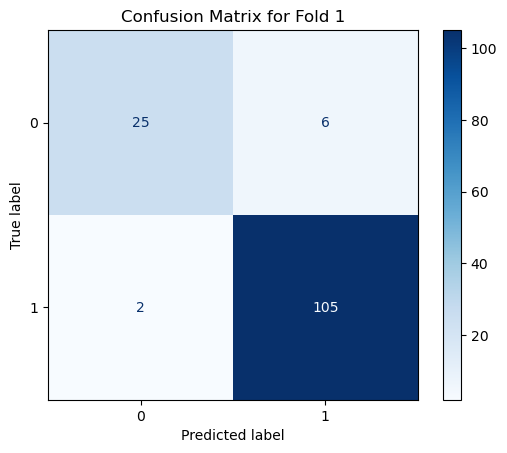

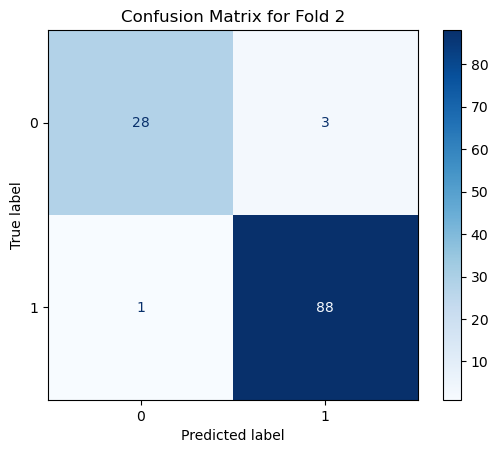

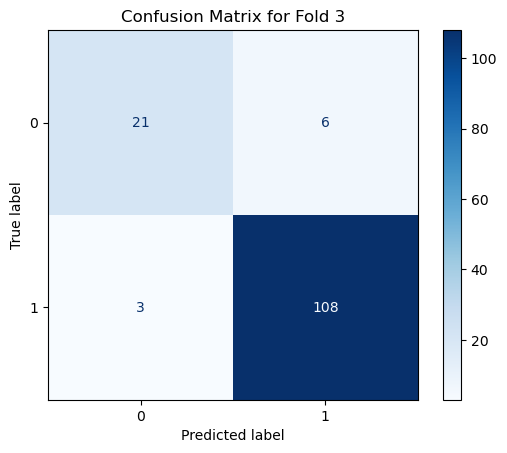

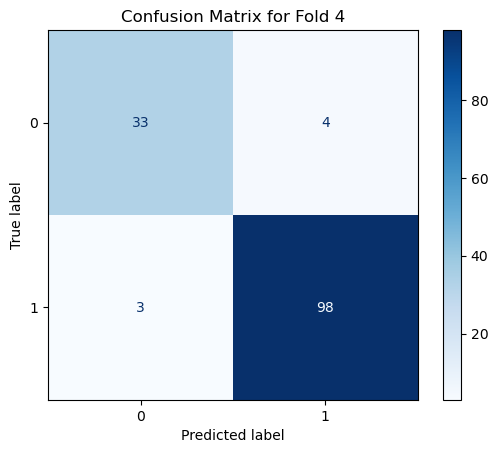

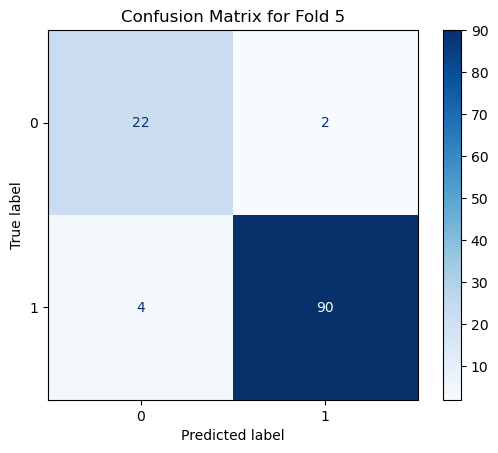

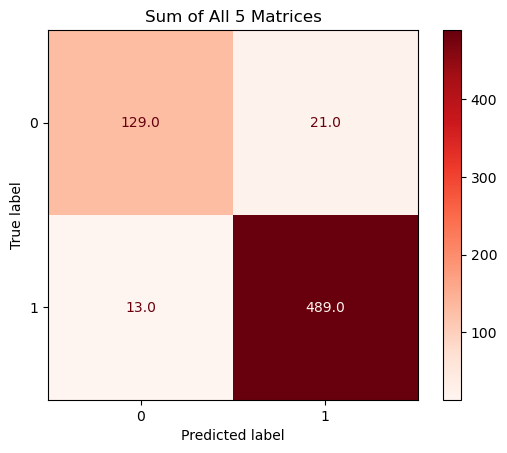

In [31]:
#Creating Confusion Matrix
X = np.array(X)
y = np.array(y)
z = np.zeros((2,2))
for fold_idx, (train_idx, test_idx) in enumerate(ps.split(), 1):
    # Split data into train and test
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred).astype(int)
    z = z + cm

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Fold {fold_idx}")
    plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=z)
disp.plot(cmap="Reds", values_format = "")
plt.title(f"Sum of All 5 Matrices")
plt.show()

Fitting the Final Model (One without outliers on the filtered gene expression data) and Predicting all Missing ER Values

In [ ]:
#Fitting Final Model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
#Predicting all Missing Values
missingvalpred = rf.predict(CleanMissingValues)

In [ ]:
#Combining predictions with Missing Value dataset
ReducedMissingVal = MissingValues["PredictedER"]
#Creating a dataset with just the ER Predictions indexed by mRNA
print(ReducedMissingVal)

KeyError: 'PredictedER'

Running RF on Filtered Data with Outliers, on the 5 folds Minji Generated

In [ ]:
#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1
#Setting up X and y
X = fulldf.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2", "Group"]) 
y = fulldf["ER"] 
#Splitting data and setting up predefined split
group_indices = fulldf['Group'].values  
ps = PredefinedSplit(group_indices)

#Running RF Cross-Validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=ps, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.92198582 0.91608392 0.95744681 0.91129032]
Mean accuracy: 0.9267017156945091
